# 1. ETL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ndtv_data_final.csv")
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [4]:
df.shape

(1359, 22)

# 2.EDA

In [5]:
df.describe()

,Unnamed: 0,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,679.000000,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,392.453819,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,0.000000,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,339.500000,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,679.000000,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,1018.500000,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,1358.000000,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


Note :
- Battery is interesting
- Ram
- Internal Storage
- Battery capacity (mAh)
- IOS vs not IOS

#### checking Error value or converting

In [6]:
#Checking Operating System
df['Operating system'].unique()

array(['Android', 'iOS', 'Cyanogen', 'BlackBerry', 'Windows', 'Tizen',
       'Sailfish'], dtype=object)

In [7]:
ios = df['Operating system'] == 'iOS'
noios = df['Operating system'] != 'iOS'

df['Operating system'][ios].count(),df['Operating system'][noios].count()  

(17, 1342)

In [8]:
#converting Operating system
df['os'] = 1

In [9]:
df.loc[ios, 'os'] = 1
df.loc[noios, 'os'] = 0

In [10]:
df.os.unique()

array([0, 1], dtype=int64)

In [11]:
#checking is it Error value?
df[df['RAM (MB)'] <= 100]

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,os
443,443,Nokia Asha 502,Nokia,Asha 502,1010,3.0,Yes,240,320,1,...,0.0,Cyanogen,Yes,Yes,No,2,No,No,3499,0
587,587,Nokia Asha 501,Nokia,Asha 501,1200,3.0,Yes,240,320,1,...,0.0,Cyanogen,Yes,Yes,No,2,No,No,4999,0


In [12]:
#checking is it Error value?
df[df['Internal storage (GB)'] == 0.064]

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,os
443,443,Nokia Asha 502,Nokia,Asha 502,1010,3.0,Yes,240,320,1,...,0.0,Cyanogen,Yes,Yes,No,2,No,No,3499,0


#### 2.1 Univariate Analysis
- look at one variavle
- main tools - countplot and displot
- countplot for discrete features
- displot for continuous features

In [13]:
df.columns

Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price', 'os'],
      dtype='object')

In [14]:
df['RAM (MB)'].unique(),df['Internal storage (GB)'].unique(),df['Resolution x'].unique(),df['Resolution y'].unique(),df['Battery capacity (mAh)'].unique()
#All are discrete features

(array([12000,  6000,  4000,  8000,  3000,  2000,   512,  1000,    64,
          384,   289,   256,   768], dtype=int64),
 array([2.56e+02, 6.40e+01, 1.28e+02, 3.20e+01, 1.60e+01, 8.00e+00,
        4.00e+00, 6.40e-02, 1.60e-01, 3.00e+00, 1.28e-01, 5.12e-01,
        5.12e+02, 2.00e+00, 1.00e+00]),
 array([1440, 1080, 1242,  828, 1125,  750,  720,  240, 2160,  640, 1600,
         768, 1520,  540,  480, 1280,  850,  560,  360,  600, 1176,  400,
        1536, 1880,  854,  800, 1024,  320], dtype=int64),
 array([3120, 2400, 2688, 1792, 2340, 3040, 2436, 2960, 2160, 2240, 2280,
        2246, 2560, 1334, 1920, 2880, 1280, 1600, 1560, 2520, 2248, 1520,
        2310, 2220, 2244, 2316, 1440,  320, 3840, 1136, 1544, 1500,  720,
        1620, 1480, 1080,  960,  854,  800,  480, 3200, 2636, 1548, 2152,
        2270, 1580, 1498, 1290,  640, 1820,  584,  600,  485], dtype=int64),
 array([4085, 4000, 3969, 3110, 3800, 4300, 6000, 3765, 4065, 4045, 4200,
        3300, 3700, 2942, 2658, 3430, 2915, 3000

<AxesSubplot:xlabel='Battery capacity (mAh)', ylabel='count'>

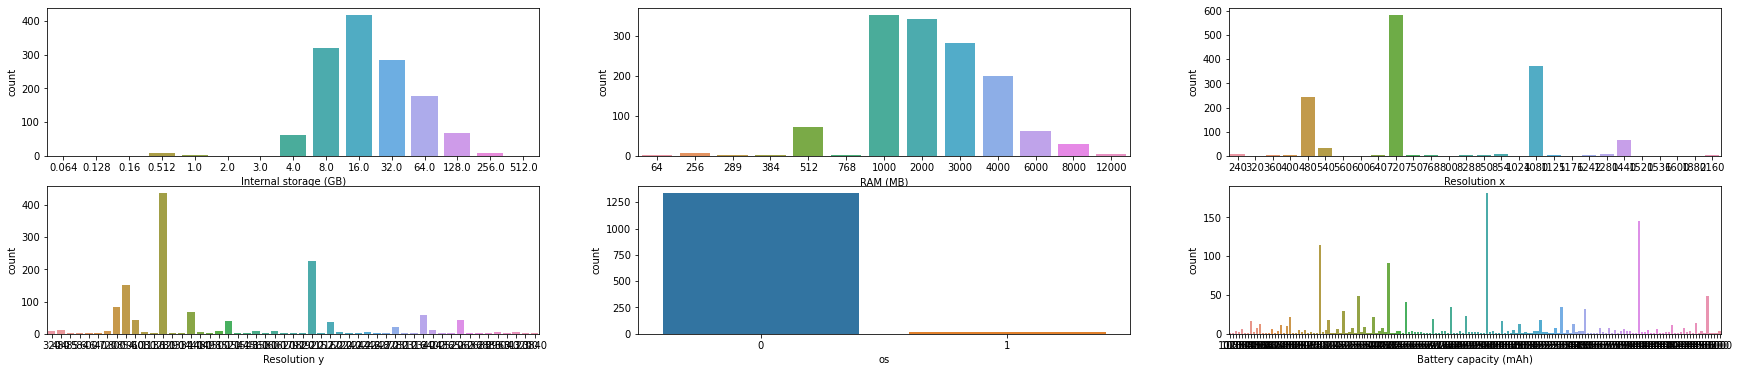

In [15]:
#let's countplot
plt.figure(figsize=(30, 6))
plt.subplot(2, 3, 1)
sns.countplot(data = df, x ='Internal storage (GB)')
plt.subplot(2, 3, 2)
sns.countplot(data = df, x ='RAM (MB)')
plt.subplot(2, 3, 3)
sns.countplot(data = df, x ='Resolution x')
plt.subplot(2, 3, 4)
sns.countplot(data = df, x ='Resolution y')
plt.subplot(2, 3, 5)
sns.countplot(data = df, x ='os')
plt.subplot(2, 3, 6)
sns.countplot(data = df, x ='Battery capacity (mAh)')

In [1]:
#let's displot 
sns.distplot(df['Screen size (inches)'])
# Screen size (inches) is continuous features
df['Screen size (inches)'].unique()

NameError: name 'sns' is not defined

#### 2.2 Multivariate analysis
- boxplot : for discrete vs continuous features
- scatterplot : for continuous vs continuous features

In [17]:
df.columns

Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price', 'os'],
      dtype='object')

<AxesSubplot:xlabel='Internal storage (GB)', ylabel='Price'>

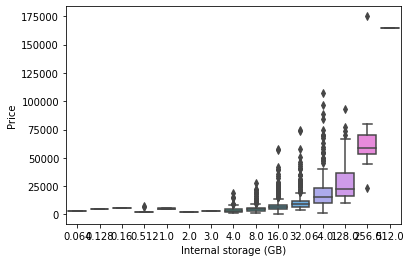

In [18]:
#let's boxplot
sns.boxplot(x = df['Internal storage (GB)'], y= df['Price'])
# interesting storage has impacted the price

<AxesSubplot:xlabel='RAM (MB)', ylabel='Price'>

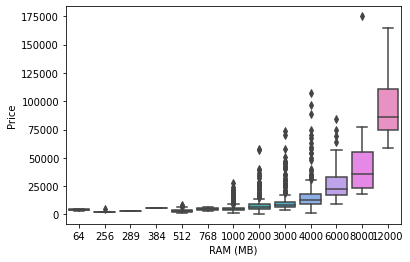

In [19]:
sns.boxplot(x = df['RAM (MB)'], y= df['Price'])
# interesting it follow up 

<AxesSubplot:xlabel='Number of SIMs', ylabel='Price'>

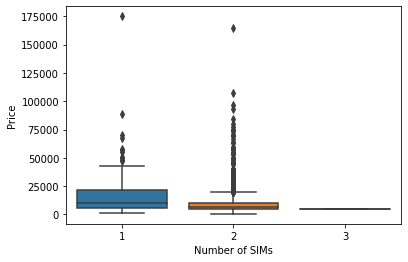

In [20]:
sns.boxplot(x = df['Number of SIMs'],y=df['Price'])
#so so number of SIM 1 and 2 is almost similar

<AxesSubplot:xlabel='os', ylabel='Price'>

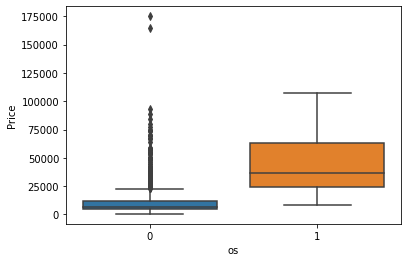

In [21]:
sns.boxplot(x = df['os'], y= df['Price'])
# so so because the price of noios(0) product still follow as expensive as ios(1)

<AxesSubplot:xlabel='Battery capacity (mAh)', ylabel='Price'>

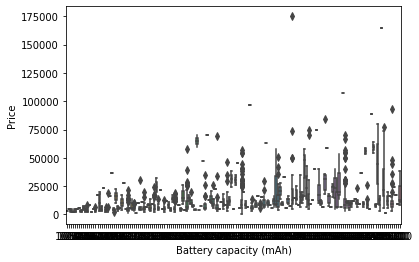

In [22]:
sns.boxplot(x = df['Battery capacity (mAh)'], y= df['Price']) 
#so so it is quiet diverse

<AxesSubplot:xlabel='Screen size (inches)', ylabel='Price'>

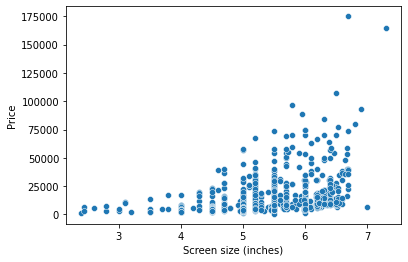

In [23]:
#let's scatterplot
sns.scatterplot(x = df['Screen size (inches)'], y=df['Price'])
# it is relational with price

<AxesSubplot:>

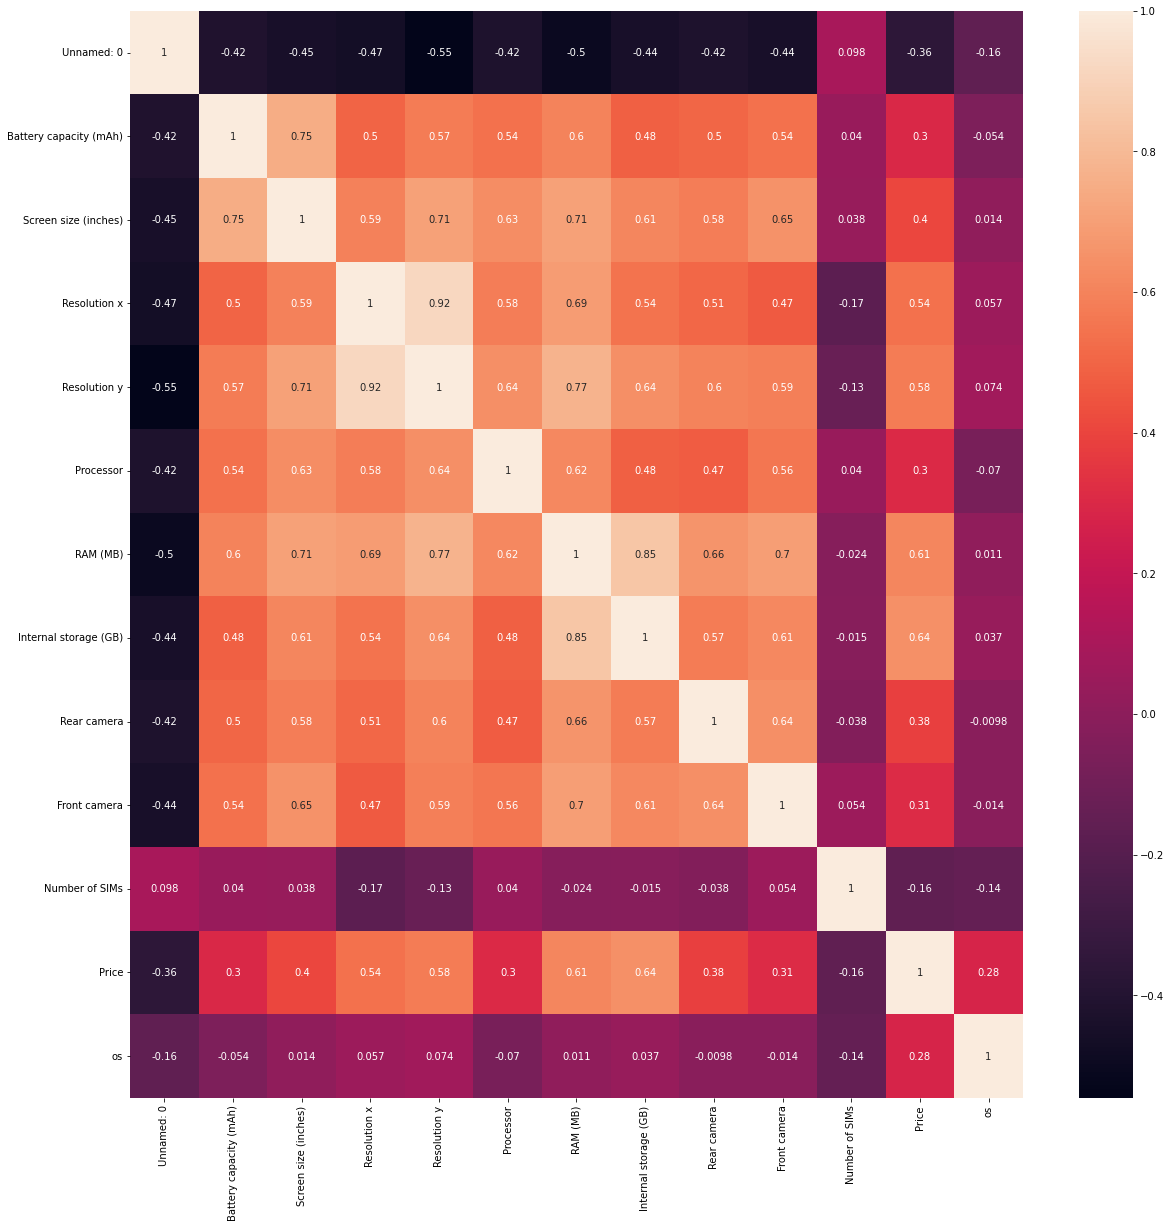

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [25]:
#summary: Screen size (inches), Internal storage (GB), RAM (MB) is acceptable
# operating system in term of ios and noios is not good enough.
#Let's say those are best three as features


# 3.Feature Extraction / Selection

In [26]:
df.columns

Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price', 'os'],
      dtype='object')

In [27]:
X =  df[['Screen size (inches)','Internal storage (GB)','RAM (MB)']]
y = df[['Price']]

assert X.shape[0] > 0
assert X.shape[1] > 0
assert y.shape[0] > 0

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=999)
#I use about 80 % of your data for training, and about 20 % of your data for test
#Because the data set is pretty much already.

In [28]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((1087, 3), (272, 3), (1087, 1), (272, 1))

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 1154 to 348
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Screen size (inches)   1087 non-null   float64
 1   Internal storage (GB)  1087 non-null   float64
 2   RAM (MB)               1087 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 34.0 KB


In [30]:
y_train.info()
#All X_train and y_train is number already

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 1154 to 348
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1087 non-null   int64
dtypes: int64(1)
memory usage: 17.0 KB


# 4.Cleaning/Preprocessing
- Fill - Standardize

## 4.1 Fill (Features are not NULL)
- check which one has contained the NULL value

In [31]:
X_train.isna().sum(), X_test.isna().sum()

(Screen size (inches)     0
 Internal storage (GB)    0
 RAM (MB)                 0
 dtype: int64,
 Screen size (inches)     0
 Internal storage (GB)    0
 RAM (MB)                 0
 dtype: int64)

## 4.2 Standardize Data
- Normalized Data using StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
#1. cretate the object
sc = StandardScaler()
#2. fit and transform the training set
X_train = sc.fit_transform(X_train)
#3. transform the test set
X_test = sc.transform(X_test)

y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [33]:
#checking Features mean is 0?
X_train[:,0].mean(),X_train[:,1].mean(),X_train[:,2].mean()
#All are 0

(-8.563118526639662e-16, 1.519790120186047e-16, 5.719640237259316e-17)